In [90]:
import re
import numpy as np
import pandas as pd
import statistics
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('merged_data.csv',encoding='utf-8')
#df = df[['Title','Summary','Genres','pos','neg']]

In [98]:
genres = []
for x in df['Genres']:
    g = re.findall(': \"(.*?)\"', x)
    genres.append(g)

In [99]:
df['Genres'] = genres
df.head()

,Title,WikiID,Genres,Summary,pos,neg,compound,neu
0,Ghosts of Mars,975900,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",0.065,0.150,-0.9913,0.786
1,White Of The Eye,9363483,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,0.078,0.198,-0.9985,0.724
2,A Woman in Flames,261236,[Drama],"Eva, an upper class housewife, becomes frustra...",0.100,0.065,0.9604,0.835
3,The Sorcerer's Apprentice,18998739,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns...",0.092,0.131,-0.8885,0.776
4,Little city,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a...",0.089,0.108,-0.7097,0.804


In [100]:
print(max(df['pos']))
print(max(df['neg']))

0.57
0.597


In [101]:
'''X = df[['pos','neg']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
df['k=2'] = kmeans.labels_

X = df[['pos','neg']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_
df['k=3'] = kmeans.labels_

X = df[['pos','neg']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_
df['k=4'] = kmeans.labels_'''

X = df[['pos','neg']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_
df['k=5'] = kmeans.labels_

In [102]:
df.head(10)

,Title,WikiID,Genres,Summary,pos,neg,compound,neu,k=5
0,Ghosts of Mars,975900,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",0.065,0.150,-0.9913,0.786,4
1,White Of The Eye,9363483,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,0.078,0.198,-0.9985,0.724,1
2,A Woman in Flames,261236,[Drama],"Eva, an upper class housewife, becomes frustra...",0.100,0.065,0.9604,0.835,0
3,The Sorcerer's Apprentice,18998739,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns...",0.092,0.131,-0.8885,0.776,2
4,Little city,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a...",0.089,0.108,-0.7097,0.804,2
5,Henry V,171005,"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,0.065,0.032,0.3182,0.903,0
6,Aaah Belinda,18296435,[Comedy],"Serap, a young actress with a strong, lively p...",0.096,0.168,-0.8074,0.736,2
7,The Mechanical Monsters,11250635,"[Science Fiction, Adventure, Animation, Short ...",The story starts as one of the robots flies i...,0.091,0.075,0.9463,0.834,0
8,Mary Poppins,77856,"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,0.109,0.082,0.9945,0.809,2
9,Die Fahne von Kriwoj Rog,32456683,[],"Otto Brosowski, a communist miner, writes to t...",0.101,0.090,0.3612,0.809,2


In [103]:
df.to_csv (r'merged_kmeans.csv', index = False, header=True)

In [9]:
print(kmeans.cluster_centers_)

[[0.06711672 0.04812787]
 [0.06227717 0.21820184]
 [0.11817479 0.11362219]
 [0.18591696 0.05011211]
 [0.05184902 0.12665329]]


In [11]:
x=y = 0
print(x)

0


In [ ]:
df5 = df

In [11]:
print(df['Genres'][0])
type(df['Genres'][0])

['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western']


list

In [12]:
total = []
for x in df['Genres']:
    total = total + x
total = dict(Counter(total))

In [13]:
total

{'Absurdism': 79,
 'Acid western': 7,
 'Action': 5868,
 'Action Comedy': 142,
 'Action Thrillers': 405,
 'Action/Adventure': 3553,
 'Addiction Drama': 42,
 'Adult': 117,
 'Adventure': 3248,
 'Adventure Comedy': 123,
 'Airplanes and airports': 53,
 'Albino bias': 14,
 'Alien Film': 97,
 'Alien invasion': 4,
 'Americana': 91,
 'Animal Picture': 141,
 'Animals': 15,
 'Animated Musical': 43,
 'Animated cartoon': 94,
 'Animation': 2441,
 'Anime': 305,
 'Anthology': 7,
 'Anthropology': 2,
 'Anti-war': 32,
 'Anti-war film': 31,
 'Apocalyptic and post-apocalyptic fiction': 32,
 'Archaeology': 10,
 'Archives and records': 6,
 'Art film': 351,
 'Auto racing': 50,
 'Avant-garde': 83,
 'B-Western': 19,
 'B-movie': 386,
 'Backstage Musical': 20,
 'Baseball': 9,
 'Beach Film': 19,
 'Beach Party film': 2,
 'Bengali Cinema': 10,
 'Biker Film': 20,
 'Biographical film': 625,
 'Biography': 592,
 'Biopic [feature]': 365,
 'Black comedy': 834,
 'Black-and-white': 3731,
 'Blaxploitation': 79,
 'Bloopers & 

In [71]:
def genre_counts(k):
    dct = {}
    for i in range(len(df)):
        label = df['k='+str(k)][i]
        genres = df['Genres'][i]
        if label not in dct:
            dct[label] = genres
        elif len(genres)>0:
            dct[label] = dct[label]+genres
    dct.update((k,dict(Counter(v))) for k,v in dct.items())
    return dct

In [72]:
gc5 = genre_counts(5)

In [73]:
def print_percents(dct):
    for item in dct.items():
        print('label: '+str(item[0]))
        percents = []
        for genre,cnt in item[1].items():
            percents.append(cnt/total[genre])
            
        _ = plt.hist(percents, bins='auto')
        plt.show()
        np.histogram(percents)
        print('mean %: '+str(np.mean(percents)))
        print('min %: '+str(np.min(percents)))
        print('max %: '+str(np.max(percents)))
        print('')

label: 4


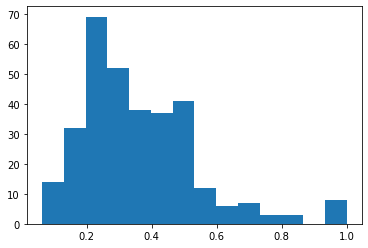

mean %: 0.3588047266751316
min %: 0.0625
max %: 1.0

label: 1


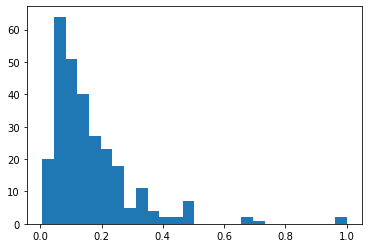

mean %: 0.16182022729831405
min %: 0.005714285714285714
max %: 1.0

label: 0


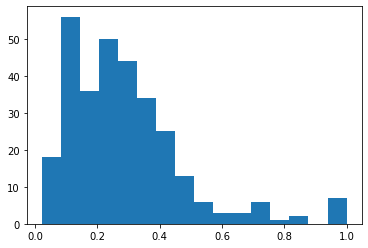

mean %: 0.2922194935780629
min %: 0.023255813953488372
max %: 1.0

label: 2


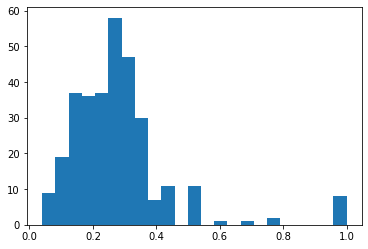

mean %: 0.2771929069682304
min %: 0.04
max %: 1.0

label: 3


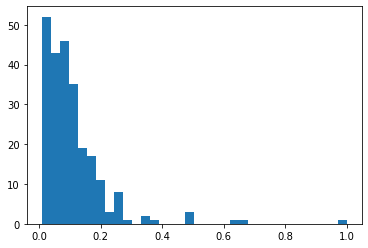

mean %: 0.10837596622386295
min %: 0.008849557522123894
max %: 1.0



In [75]:
print_percents(gc5)

In [76]:
gc4 = genre_counts(4)

label: 1


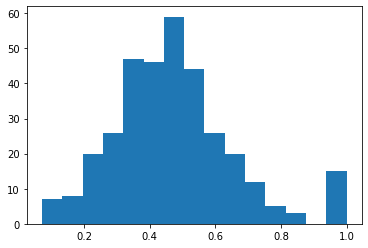

mean %: 0.47498382438950665
min %: 0.07142857142857142
max %: 1.0

label: 2


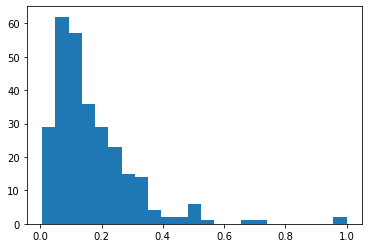

mean %: 0.16795761264732878
min %: 0.005714285714285714
max %: 1.0

label: 3


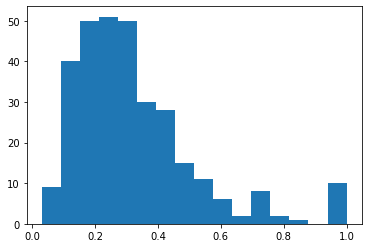

mean %: 0.3266828244046966
min %: 0.03125
max %: 1.0

label: 0


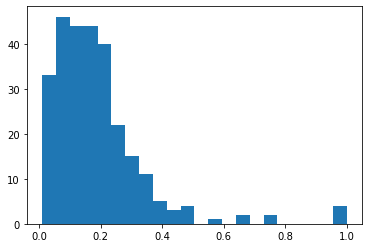

mean %: 0.19023109176027303
min %: 0.008928571428571428
max %: 1.0



In [79]:
print_percents(gc4)

In [78]:
gc3 = genre_counts(3)

label: 0


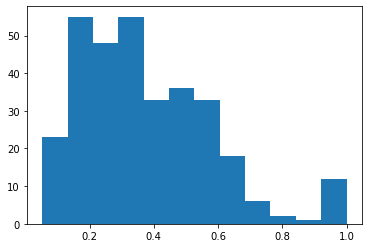

mean %: 0.3799892473995057
min %: 0.05263157894736842
max %: 1.0

label: 2


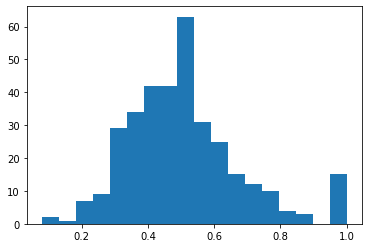

mean %: 0.5071342071164522
min %: 0.08
max %: 1.0

label: 1


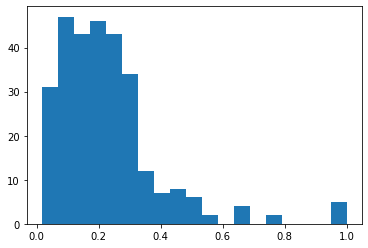

mean %: 0.22823894858379193
min %: 0.017857142857142856
max %: 1.0



In [80]:
print_percents(gc3)